# FINAL PROJECT 2 KAMPUS MERDEKA - KELOMPOK 4
NAMA KELOMPOK :
- ALFENDO RIZKY SYACHPUTRA
- SAVITRI DYAH AYU PITALOKA
- SYAIMA RADESTYA

## 1. Perkenalan (Overview)
***
#### **Latar Belakang**
Menurut KBBI pengertian cuaca adalah keadaan udara seperti temperatur, cahaya matahari, kelembapan, kecepatan angin, pada suatu tempat tertentu dengan jangka waktu terbatas. Cuaca juga dapat diartikan sebagai keadaan harian udara suatu wilayah yang tidak luas pada saat tertentu. Kondisi cuaca ini bisa berubah sewaktu-waktu. Keadaan cuaca ini selalu diamati.

Adapun salah satu fenomena penting bagi kehidupan yang dipengaruhi oleh cuaca adalah hujan. Berdasarkan permasalahan itu, maka perlu dilakukan sebuah analisis dengan suatu model yang dapat digunakan untuk memprediksi terjadinya hujan agar manusia dapat menjalankan aktivitas dengan lebih baik.

#### **Dataset**
Dataset yang digunakan pada project ini yaitu Rain in Australia yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

Dataset ini  berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. Dataset ini terdiri dari 23 atribut dan 145460 baris. Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (terjadi hujan besok 1mm atau lebih).

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep Classification dengan Logistic Regression dan SVM.
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM.
- Dapat mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi.
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi cuaca pada hari esok.

## 2. Import Library yang Dibutuhkan
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import pickle

## 3. Data Loading
***
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [2]:
# loading data with pandas
df = pd.read_csv('weatherAUS.csv')

In [3]:
# setting for see all the columns
pd.set_option("display.max_columns", None)

In [4]:
# melihat dimensi dataset
df.shape

(145460, 23)

In [5]:
# melihat 5 baris teratas dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# melihat 5 baris terbawah dataset
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
# menampilkan informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Menampilkan daftar kolom (atribut)
atribut = df.columns.values
print(atribut)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']


In [9]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


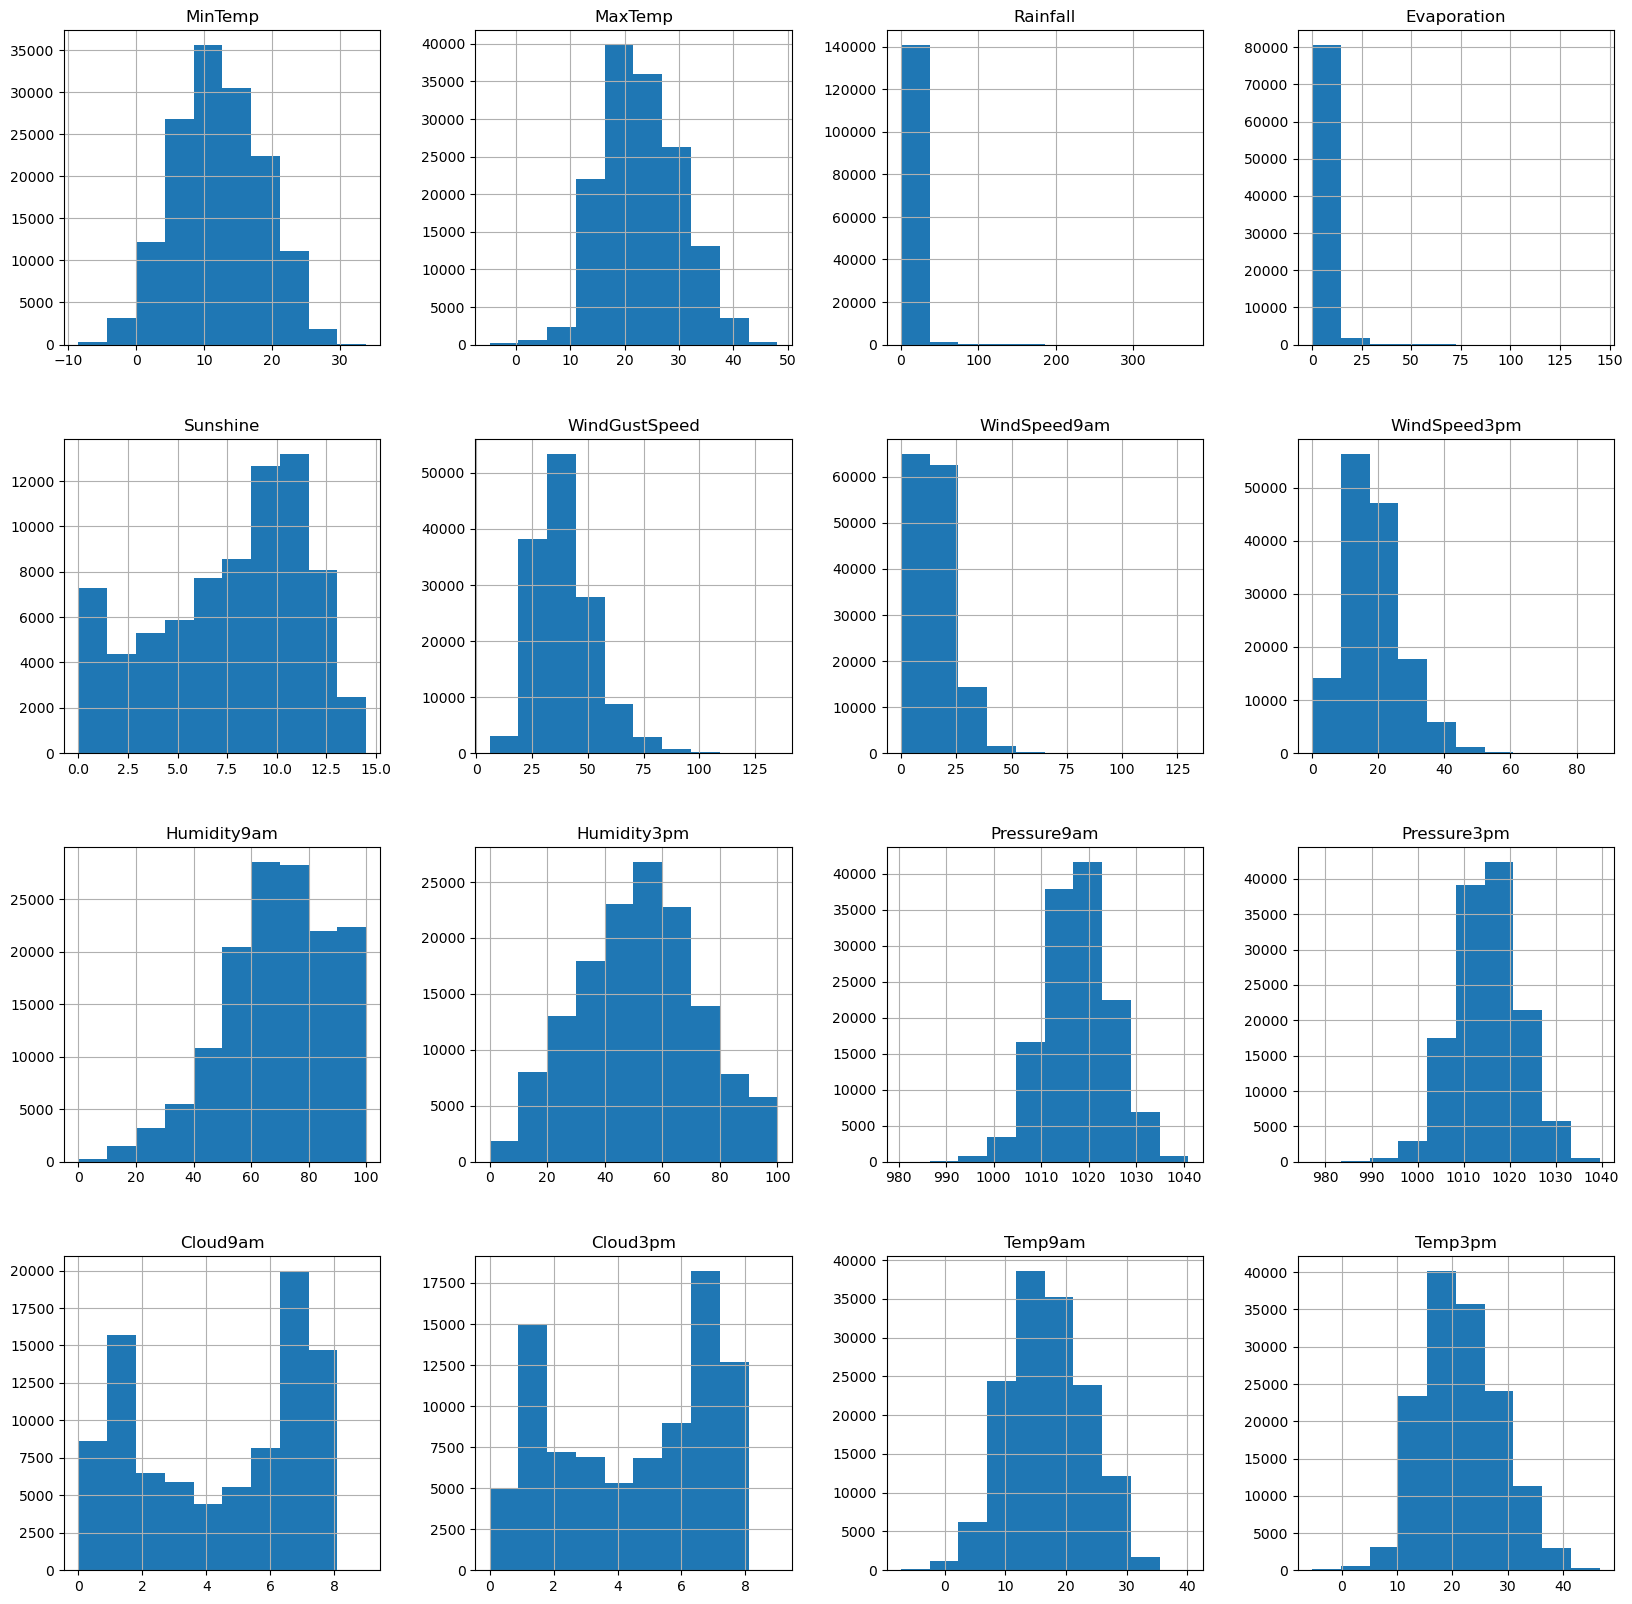

In [10]:
# Melihat distribusi pada atribut numerik
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

- Berdasarkan histogram terlihat bahwa beberapa atribut berdistribusi normal, seperti Humidity3pm, MinTemp, Temp9am, sedangkan beberapa atribut memiliki skewness yang tinggi, yaitu atribut Evaporation dan Rainfall.

In [11]:
# Melihat statistik deskriptif dari data yang bertipe numerik
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [12]:
# Melihat statistik deskriptif dari masing-masing atribut yang bertipe object
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [13]:
# Cek apakah ada missing value pada dataset
df.isnull().values.any()

True

In [14]:
# Melihat banyaknya unique values pada masing-masing atribut
for col in df.columns :
    print(col, ':', df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 681
Evaporation : 358
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 441
Temp3pm : 502
RainToday : 2
RainTomorrow : 2


In [15]:
# Menampilkan unique values pada kolom Location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [16]:
# Menampilkan unique values pada kolom Date
df['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

## 4. Data Cleaning
***
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

##### Cek duplikat pada datset

In [17]:
df.duplicated().sum()

0

##### Melihat apakah terdapat missing values pada tiap kolom

In [18]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

##### Menampilkan berapa persen missing value pada tiap kolom

In [19]:
miss_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
miss_value

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

##### Menampilkan visualisasi data yang terdapat missing value

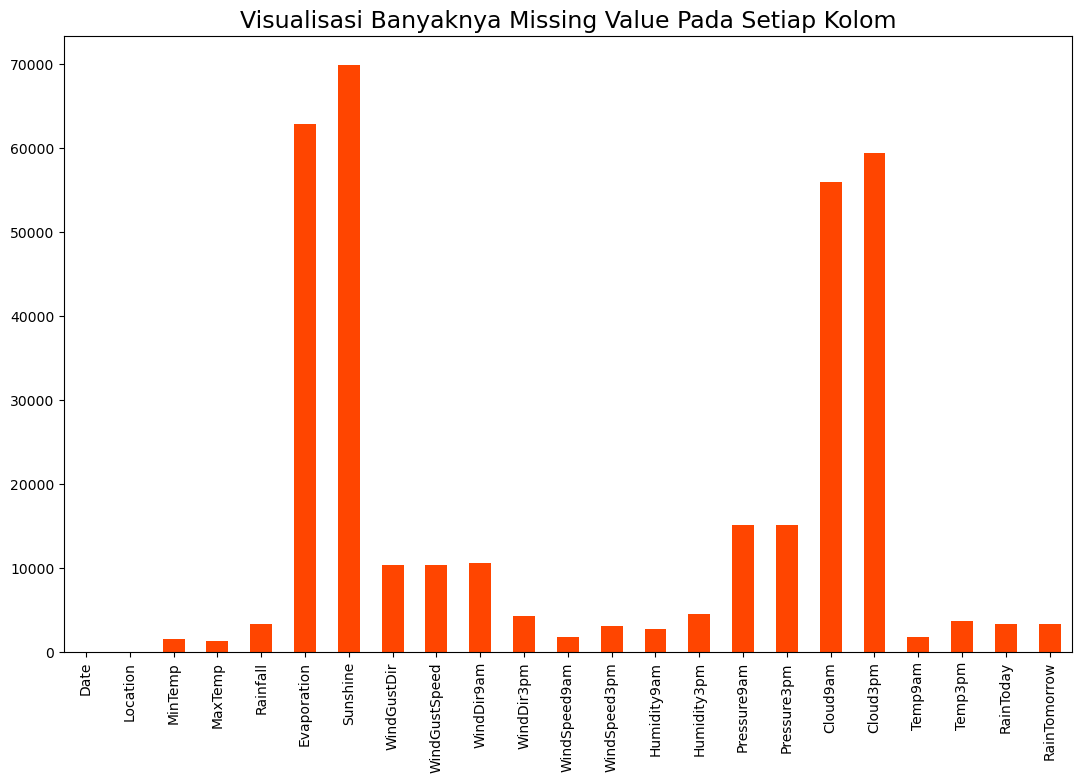

In [20]:
df.isnull().sum().plot.bar(figsize = (13,8), color="orangered")
plt.title("Visualisasi Banyaknya Missing Value Pada Setiap Kolom", fontsize=17)
plt.show()

##### Menghapus kolom yang tidak diperlukan

In [21]:
# Binary encode untuk fitur RainToday dan RainTomorrow
df['RainToday'] = df['RainToday'].replace({'Yes':1,'No':0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes':1,'No':0})

In [22]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [24]:
# cek korelasi terhadap kolom Rain Tomorrow
new_col = ['RainTomorrow', 'Rainfall', 'Evaporation',
           'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
           'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
           'Temp3pm']
new_data = df[new_col]
new_data.head()

,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,0.0,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,0.0,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,0.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,0.0,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


<AxesSubplot:>

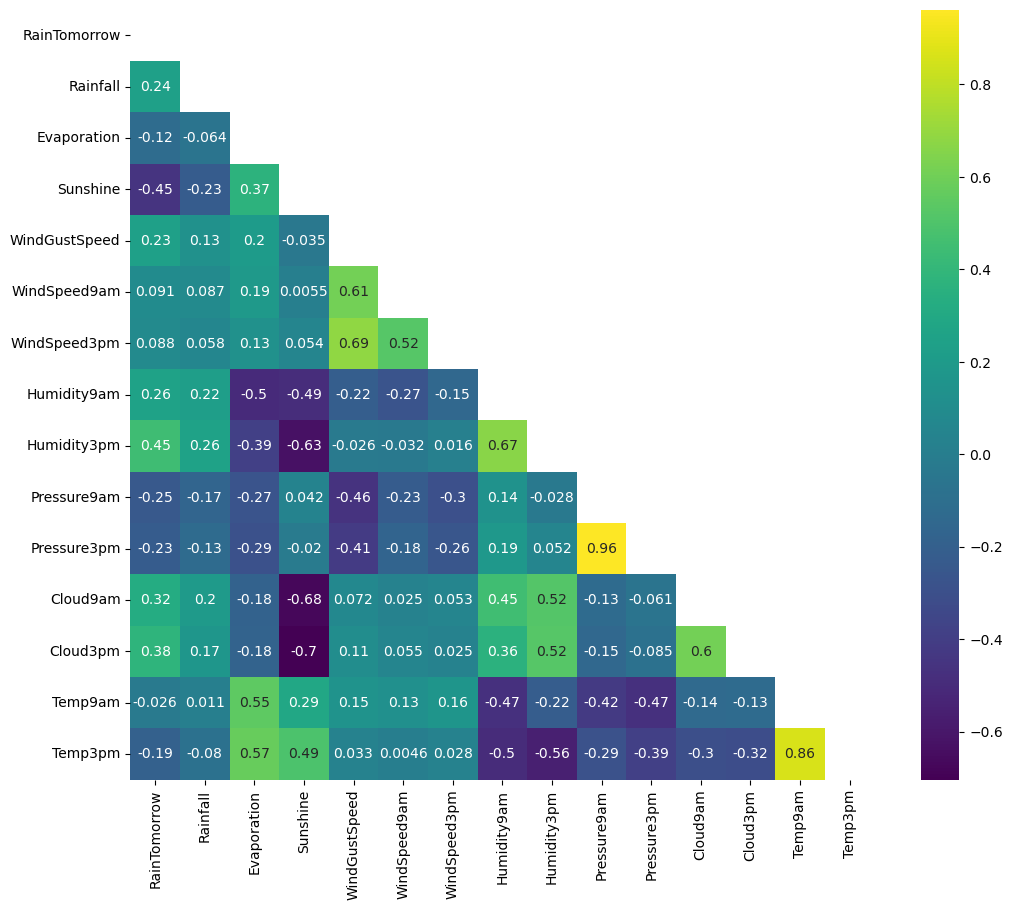

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(), annot=True, cmap='viridis', mask=np.triu(new_data.corr()))

fitur "WindSpeed9am", "WindSpeed3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm" memiliki korelasi yang cukup rendah terhadap Rain Tomorrow. lebih baik drop fitur ini 

In [26]:
# drop kolom yang disebutkan diatas dan drop kolom yang berisi data yang tidak perlu
df.drop(columns=["Date", "WindGustDir", "WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm", "Pressure9am", "Pressure3pm", 
                 "Temp9am", "Temp3pm"], axis=1, inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,44.0,71.0,22.0,8.0,NaN,0.0,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,44.0,44.0,25.0,NaN,NaN,0.0,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,46.0,38.0,30.0,NaN,2.0,0.0,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,24.0,45.0,16.0,NaN,NaN,0.0,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,41.0,82.0,33.0,7.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,31.0,51.0,24.0,NaN,NaN,0.0,0.0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,22.0,56.0,21.0,NaN,NaN,0.0,0.0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,37.0,53.0,24.0,NaN,NaN,0.0,0.0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,28.0,51.0,24.0,3.0,2.0,0.0,0.0


### Mengisi missing values pada kolom numerik dan kategorik

In [27]:
# menangani missing value pada RainTomorrow dengan melakukan drop baris
df = df.drop(df[df['RainTomorrow'].isnull()].index)
df.shape

(142193, 13)

##### Isi missing value dengan median untuk data yang bertipe numerical

In [28]:
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
print(f"Numerical Columns : {num_cols}")
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

Numerical Columns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']


##### Isi missing value dengan mode untuk data yang bertipe categorical

In [29]:
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(f"Categorical Column : {categorical_cols}")
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Categorical Column : ['Location']


In [30]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64

In [31]:
df.isnull().values.any()

False

##### Melakukan rename kolom dari dataset

In [32]:
df = df.rename(columns={
    'MinTemp':'MinTemperature', 
    'MaxTemp':'MaxTemperature', 
    'WindGustSpeed':'WindSpeed'})

df.head()

,Location,MinTemperature,MaxTemperature,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,0.0,0.0
1,Albury,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,0.0,0.0
2,Albury,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,0.0,0.0
3,Albury,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,0.0,0.0
4,Albury,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,0.0,0.0


##### Melihat banyaknya nilai dari setiap atribut

In [33]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('='*70)

Location : 
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek

##### Membuat kolom atau atribut baru
disini kami membuat atribut atau kolom baru yaitu **TempDifference** yaitu selisih temperature, yang didapatkan dengan menghitung **MaxTemperature** dikurang dengan **MinTemperature**

In [34]:
df['TempDifference'] = df['MaxTemperature'] - df['MinTemperature']

# melihat data setelah ditambahkan atribut / kolom baru
df.head()

,Location,MinTemperature,MaxTemperature,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,TempDifference
0,Albury,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,0.0,0.0,9.5
1,Albury,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,0.0,0.0,17.7
2,Albury,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,0.0,0.0,12.8
3,Albury,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,0.0,0.0,18.8
4,Albury,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,0.0,0.0,14.8


#### ANALISIS
Dari hasil pengecekan, dapat diketahui bahwa nilai missing value terdapat pada beberapa kolom dengan jumlah yang berbeda - beda. Pada visualisasi banyaknya missing value dapat dilihat pada kolom *Evaporation, Sunshine, Cloud9am dan Cloud3am* memiliki data yang paling banyak missing value. Kami mengisi missing value dengan median untuk data yang bertipe numerical dan pada kolom categorical ditangani dengan modus. Dan pada bagian ini, kami menghapus bagian kolom yang tidak diperlukan juga untuk dilakukan prediksi serta membuat kolom atau atribut baru yaitu `TempDifference` atau selisih temperature, yang didapatkan dengan menghitung `MaxTemperature` dikurang dengan `MinTemperature`

## 5. Explorasi Data
***
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

In [35]:
# Binary encode untuk fitur RainToday dan RainTomorrow
df['RainToday'] = df['RainToday'].replace({1:'Yes',0:'No'})
df['RainTomorrow'] = df['RainTomorrow'].replace({1:'Yes',0:'No'})

##### Melihat proporsi data pada kolom Location dan RainToday dengan menggunakan crosstab

In [36]:
pd.crosstab(df.RainToday, df.Location)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainToday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2414,2123,2396,2790,2356,2250,2472,2457,2047,2794,2604,2088,2022,2340,2223,2426,1302,2331,1855,2356,2681,2472,2111,2126,2234,1329,2134,2052,2414,2288,2383,2548,2442,1908,2396,2359,2486,2471,2233,2515,2436,1408,2443,1891,2265,1918,2081,2279,2789
Yes,676,893,615,241,572,778,562,704,941,624,384,865,921,852,757,762,257,697,580,653,326,382,919,781,721,240,795,912,588,474,581,645,567,1088,555,641,469,866,772,518,562,113,533,928,734,635,871,704,201


**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa seluruh lokasi lebih sering tidak mengalami hujan di tiap harinya. Adapun lokasi Uluru jarang terjadi hujan, sedangkan di lokasi Portland memiliki perbedaan yang cukup tipis antara hujan dan tidak pada setiap harinya.

##### Melihat Curah hujan tertinggi dan terendah untuk lokasi Canberra

In [37]:
df.loc[df['Location'] == 'Canberra', 'Rainfall'].agg(('min', 'max'))

min     0.0
max    87.0
Name: Rainfall, dtype: float64

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa pada lokasi Canberra (ibu kota Australia) curah hujan terendah yaitu 0.0 dan curah hujan tertinggi yaitu 87.0

##### Melihat nilai tertinggi dan terendah pada kecepatan angin (WindSpeed)

In [38]:
df.max(axis=0)['WindSpeed']

135.0

In [39]:
df.min(axis=0)['WindSpeed']

6.0

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa kecepatan angin tertinggi yaitu senilai 135km/jam. Sedangkan untuk kecepatan angin terendah didapat dengan nilai 6km/jam.

##### Mengidentifikasi rata-rata hari cerah selama 24 jam (berdasarkan sunshine) dengan melakukan grouping berdasarkan lokasi.

In [40]:
df_mean = df[['Location','Sunshine']].groupby('Location').mean().sort_values(by='Sunshine', ascending=False)
df_mean

,Sunshine
Location,
AliceSprings,9.399538
PearceRAAF,8.893447
Woomera,8.877157
PerthAirport,8.794816
Moree,8.785284
Perth,8.784090
Cobar,8.532095
Nhil,8.500000
NorahHead,8.500000


**Kesimpulan :** Dari hasil dapat dilihat bahwa untuk rata-rata waktu terlama sinar matahari muncul dalam 24 jam adalah pada daerah AliceSprings dengan rata-rata 9.399538 jam, dan waktu tercepat dengan rata-rata 6.378860 jam ada di daerah Watsonia.

##### Menampilkan histori top 5 record melakukan query sebagai berikut :
- Lokasi berada di Adelaide.
- Hari di mana turun hujan.
- Kecepatan angin 50km/jam atau lebih

In [41]:
df[
    (df['Location'] == 'Adelaide') &
    (df['RainToday'] == 'Yes') &
    (df['WindSpeed'] >= 50) 
].head()

,Location,MinTemperature,MaxTemperature,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,TempDifference
96329,Adelaide,9.5,13.1,9.0,1.2,7.2,52.0,54.0,66.0,5.0,5.0,Yes,No,3.6
96371,Adelaide,8.3,13.4,1.4,2.0,5.8,57.0,64.0,49.0,5.0,5.0,Yes,Yes,5.1
96381,Adelaide,9.6,15.2,8.4,4.8,6.2,50.0,75.0,58.0,5.0,5.0,Yes,No,5.6
96396,Adelaide,8.3,14.7,2.8,14.4,5.0,74.0,81.0,43.0,5.0,5.0,Yes,No,6.4
96464,Adelaide,8.1,17.1,5.0,4.8,10.7,54.0,50.0,46.0,5.0,5.0,Yes,No,9.0


### Visualisasi Pie Chart dan Histogram untuk Persentase Setiap Label Kelas

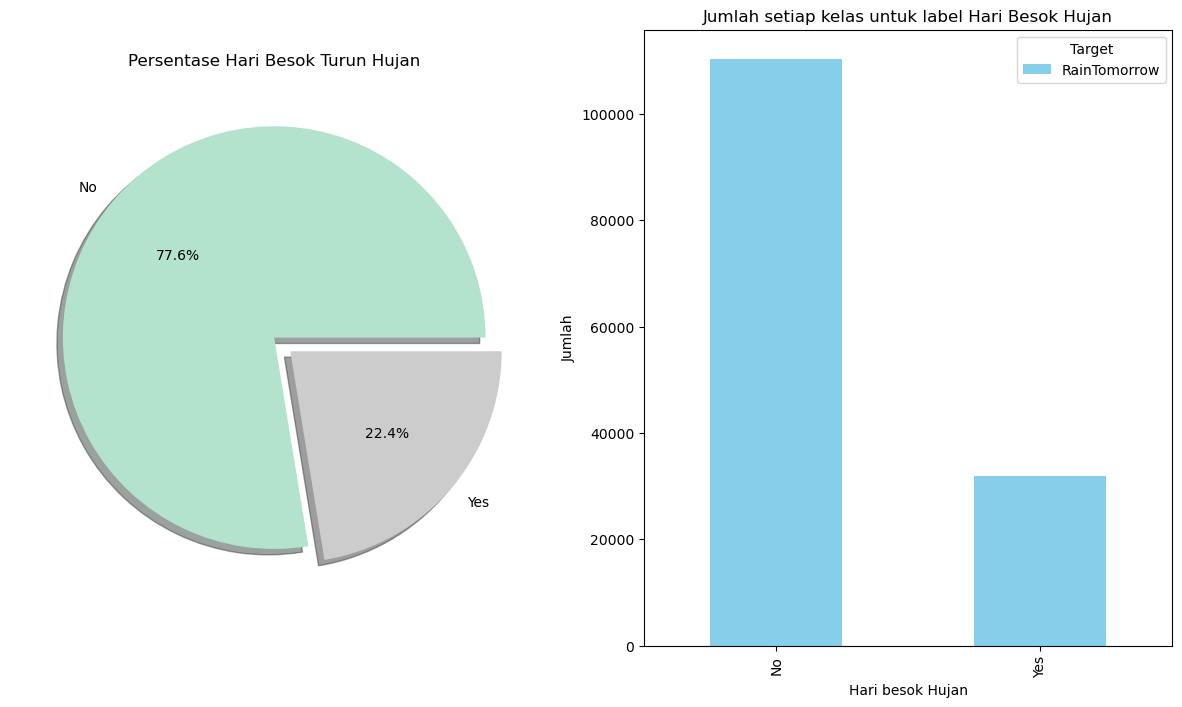

In [42]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

# Pie Chart Persentase "Rain Tomorrow"
df['RainTomorrow'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.1],
    cmap='Pastel2',
    shadow=True
)
ax[0].set_title('Persentase Hari Besok Turun Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1], 
    color='skyblue'
)
ax[1].set_title('Jumlah setiap kelas untuk label Hari Besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')
ax[1].legend(title='Target')

**Kesimpulan :** Dari hasil visualisasi pie chart dan histogram diatas maka dapat dilihat bahwa Persentase 'RainTomorrow' untuk label Yes sebesar **22,4%** dan label No sebesar **77,6%**. Hal ini berarti terdapat ketidakseimbangan label pada sampel dataset, dimana label No 3x lebih banyak dibandingkan label Yes.

### Visualisasi Bar Chart Persentase Rain Tomorrow = Yes Berdasarkan Lokasi

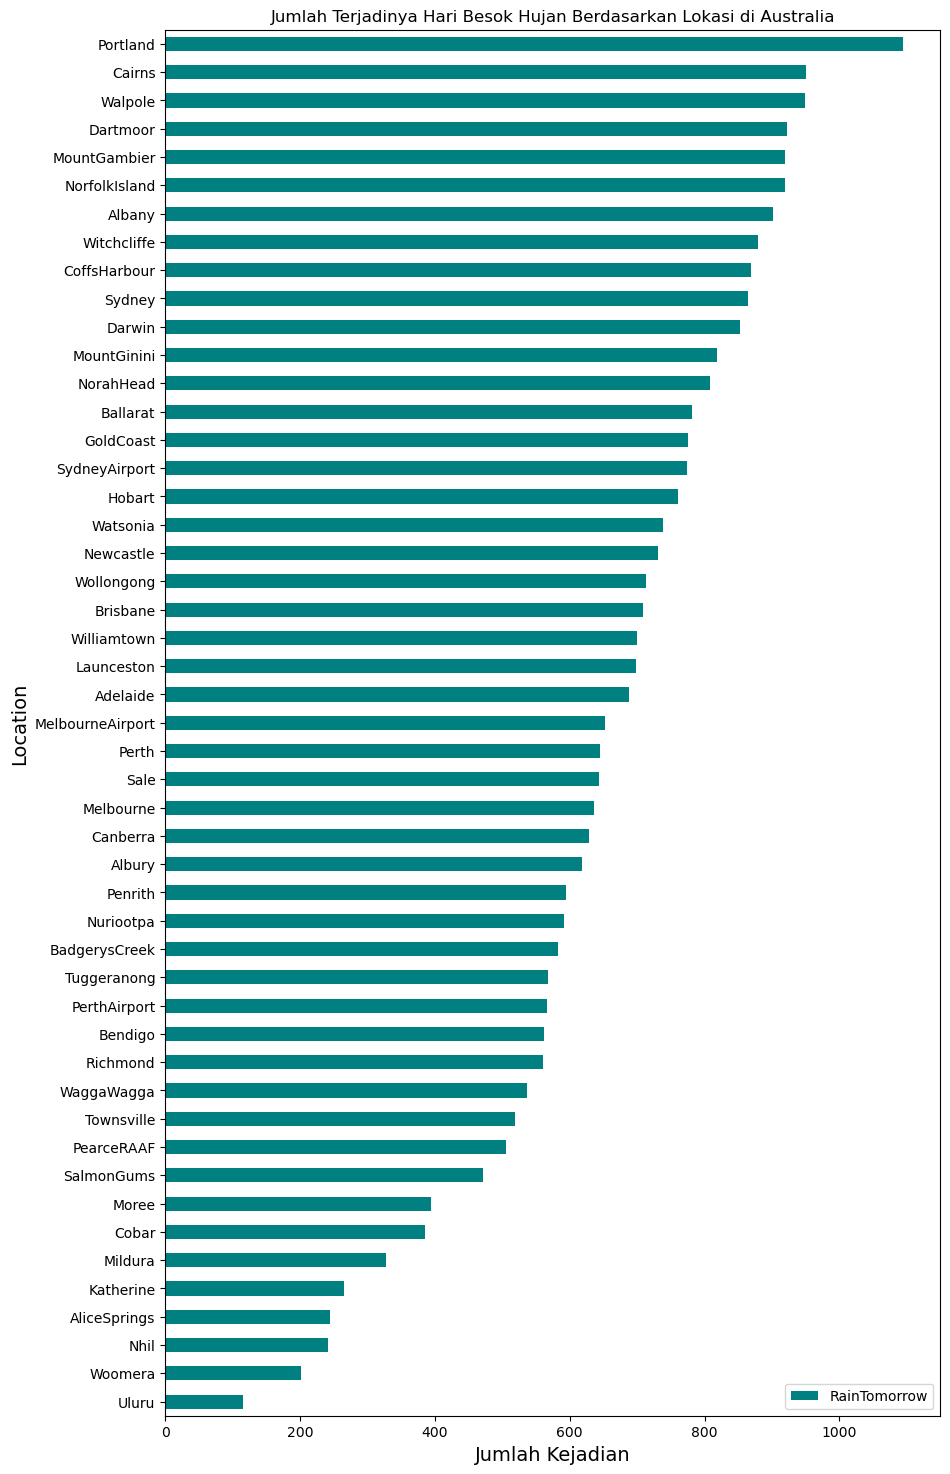

In [43]:
# kelompokkan data berdasarkan location untuk label 'Yes'
loc_no = df[
    (df['RainTomorrow']=="Yes")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
loc_no.plot(kind='barh', figsize=(10,18), color=['Teal'])

plt.ylabel("Location", fontsize=14)
plt.xlabel("Jumlah Kejadian", fontsize=14)
plt.title("Jumlah Terjadinya Hari Besok Hujan Berdasarkan Lokasi di Australia")
plt.legend()
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk location **Portland, Caims, Walpole, Dartmoor, dan MountGambier** menjadi lima kota dengan data kejadian "Rain Tomorrow" berlabel 'Yes' tertinggi. Berarti dapat disimpulkan bahwa pada lokasi tersebut sering terjadi hujan di hari besoknya.

### Visualisasi Bar Chart Persentase Rain Tomorrow = No Berdasarkan Lokasi

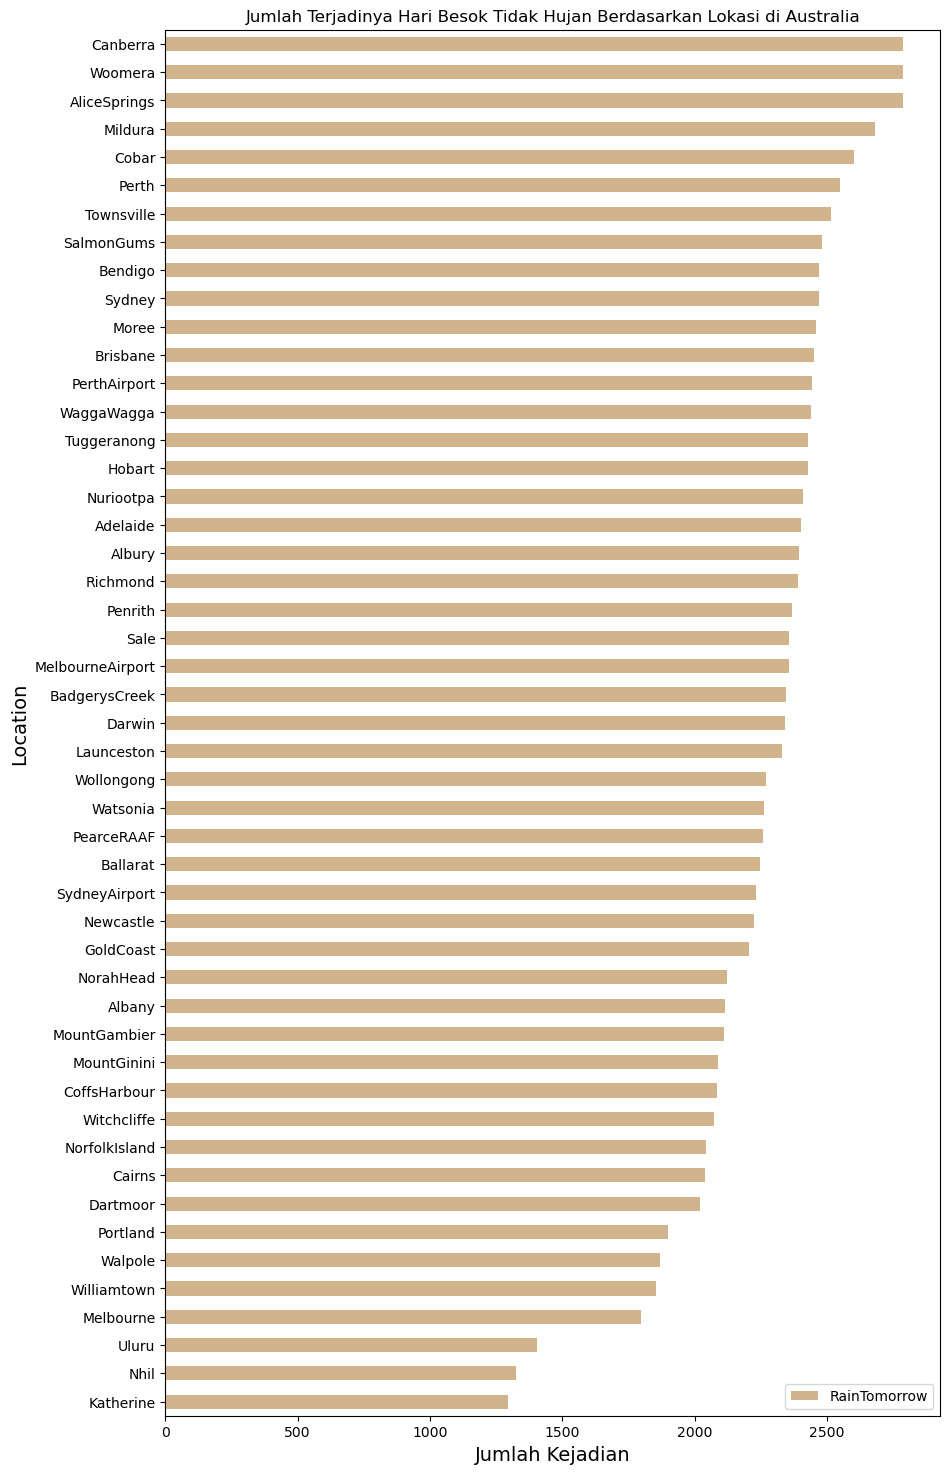

In [44]:
# kelompokkan data berdasarkan location untuk label 'No'
loc_no = df[
    (df['RainTomorrow']=="No")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
loc_no.plot(kind='barh', figsize=(10,18), color=['Tan'])

plt.ylabel("Location", fontsize=14)
plt.xlabel("Jumlah Kejadian", fontsize=14)
plt.title("Jumlah Terjadinya Hari Besok Tidak Hujan Berdasarkan Lokasi di Australia")
plt.legend()
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk location **Canberra, Woomera, AliceSprings, Mildura, dan Cobar** menjadi lima kota dengan data kejadian "Rain Tomorrow" berlabel 'No' tertinggi. Berarti dapat disimpulkan bahwa pada lokasi tersebut jarang terjadi hujan di hari besoknya.

### Visualisasi Box Plot Perbandingan perbandingan Rain Tomorrow berdasarkan Max Temperature

Text(0.5, 1.0, 'Hujan Besok vs Suhu Maksimum')

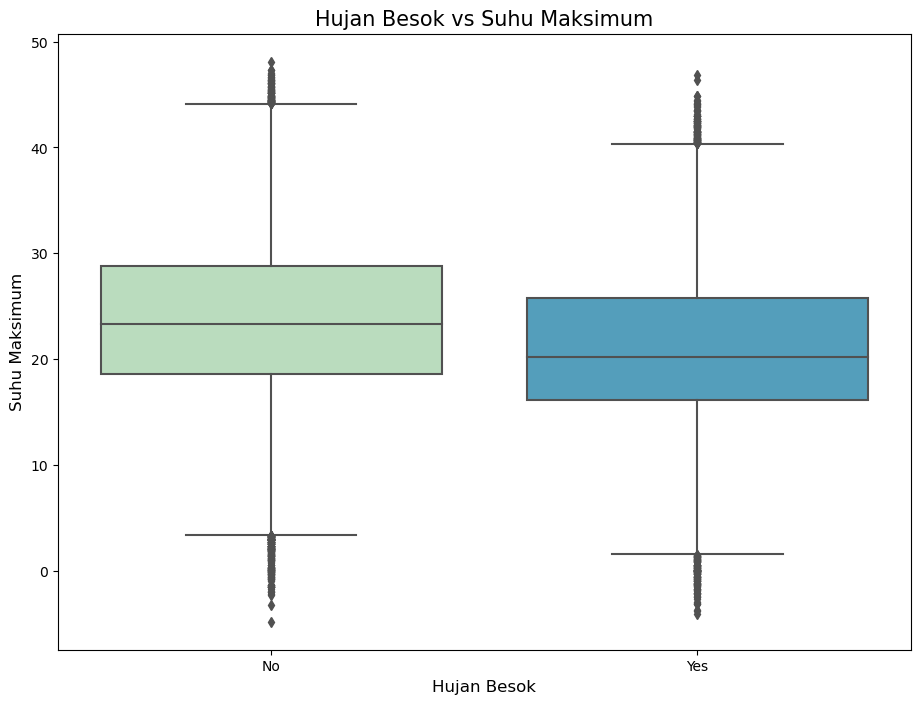

In [45]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(x='RainTomorrow', y='MaxTemperature', data=df, palette="GnBu")

plt.xlabel("Hujan Besok", fontsize= 12)
plt.ylabel("Suhu Maksimum", fontsize= 12)
plt.title("Hujan Besok vs Suhu Maksimum", fontsize= 15)

**Kesimpulan :** Dari hasil visualisasi box plot diatas maka dapat dilihat bahwa label 'Yes' memiliki jangkauan yang sedikit lebih jauh dengan label 'No' serta outlier label 'No' juga lebih banyak daripada label 'Yes'.

### Visualisasi Korelasi Antar Variabel Untuk Melihat Hubungan

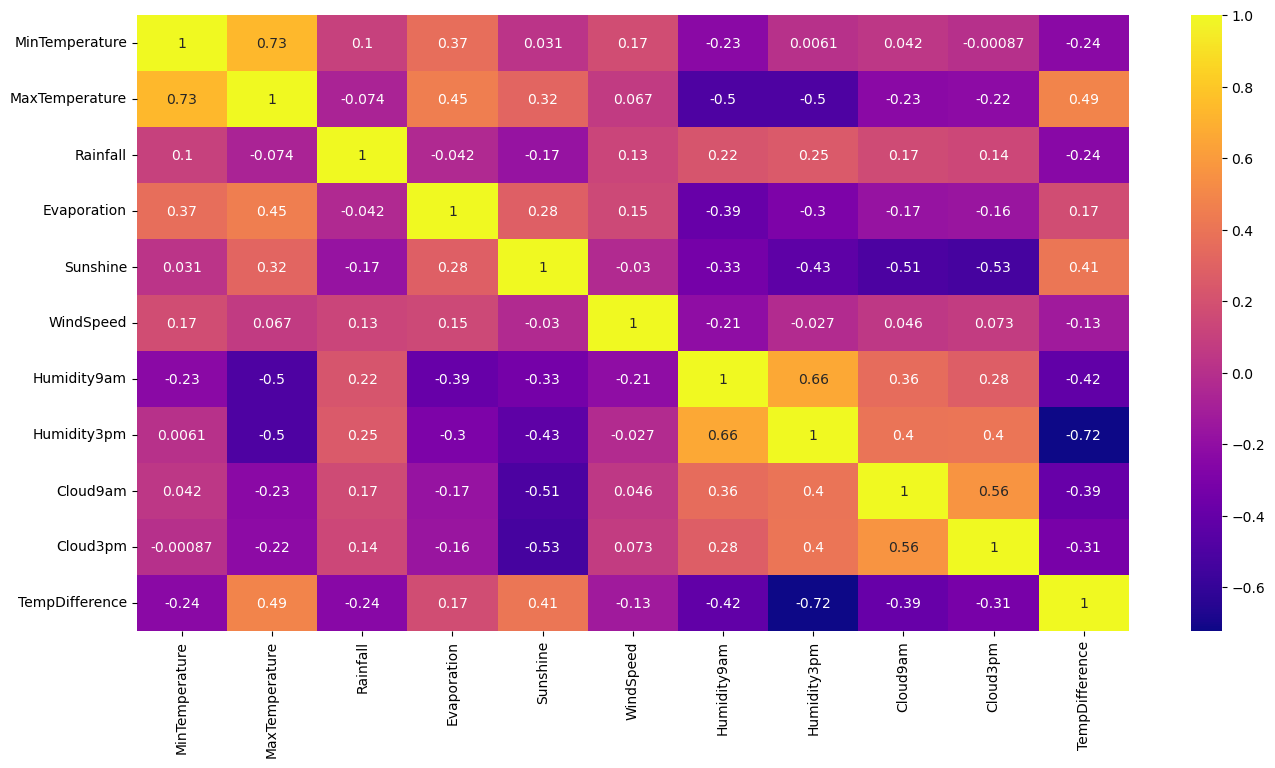

In [46]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

Dari hasil visualisasi matrix korelasi, maka dapat disimpulkan : <br>
- MaxTemperature dan MinTemperature memiliki korelasi yang paling tinggi dengan nilai **0.73**
- Humidity9am dan Humidity3pm memiliki korelasi yang tinggi ke-2 dengan nilai **0.66**
- Cloud9am dan Cloud3pm memiliki korelasi yang masih terbilang cukup tinggi dengan nilai **0.56**
- Humidity3pm memiliki korelasi rendah terhadap TempDifference yaitu -0.72

## 6. Data Preprocessing
***
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [47]:
# extract kolom categorical 
cat_col = df.select_dtypes(object).columns.tolist()
len(cat_col)

3

In [48]:
# mengonversi nilai yang dikategorikan menjadi nilai numerik
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Location        142193 non-null  int32  
 1   MinTemperature  142193 non-null  float64
 2   MaxTemperature  142193 non-null  float64
 3   Rainfall        142193 non-null  float64
 4   Evaporation     142193 non-null  float64
 5   Sunshine        142193 non-null  float64
 6   WindSpeed       142193 non-null  float64
 7   Humidity9am     142193 non-null  float64
 8   Humidity3pm     142193 non-null  float64
 9   Cloud9am        142193 non-null  float64
 10  Cloud3pm        142193 non-null  float64
 11  RainToday       142193 non-null  int32  
 12  RainTomorrow    142193 non-null  int32  
 13  TempDifference  142193 non-null  float64
dtypes: float64(11), int32(3)
memory usage: 14.6 MB


In [49]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

print(X.shape)
print(y.shape)

(142193, 13)
(142193,)


In [50]:
df

,Location,MinTemperature,MaxTemperature,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,TempDifference
0,2,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,0,0,9.5
1,2,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,0,0,17.7
2,2,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,0,0,12.8
3,2,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,0,0,18.8
4,2,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,0,0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,4.8,8.5,31.0,59.0,27.0,5.0,5.0,0,0,18.3
145455,41,2.8,23.4,0.0,4.8,8.5,31.0,51.0,24.0,5.0,5.0,0,0,20.6
145456,41,3.6,25.3,0.0,4.8,8.5,22.0,56.0,21.0,5.0,5.0,0,0,21.7
145457,41,5.4,26.9,0.0,4.8,8.5,37.0,53.0,24.0,5.0,5.0,0,0,21.5


In [51]:
# Encoding atribut RainTomorrow dan RainToday

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [52]:
df.head()

,Location,MinTemperature,MaxTemperature,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,TempDifference
0,2,13.4,22.9,0.6,4.8,8.5,44.0,71.0,22.0,8.0,5.0,0,0,9.5
1,2,7.4,25.1,0.0,4.8,8.5,44.0,44.0,25.0,5.0,5.0,0,0,17.7
2,2,12.9,25.7,0.0,4.8,8.5,46.0,38.0,30.0,5.0,2.0,0,0,12.8
3,2,9.2,28.0,0.0,4.8,8.5,24.0,45.0,16.0,5.0,5.0,0,0,18.8
4,2,17.5,32.3,1.0,4.8,8.5,41.0,82.0,33.0,7.0,8.0,0,0,14.8


In [53]:
# melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=46)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(113754, 13)
(28439, 13)
(113754,)
(28439,)


In [54]:
# Create scaler
std_scaler = StandardScaler()

In [55]:
# Fit and scale training X
xtrain = std_scaler.fit_transform(X_train)
xtest = std_scaler.transform(X_test)

## 7. Pendefinisian Model
***
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

a . Model pertama menggunakan algoritma Logistic Regression

In [56]:
model1 = LogisticRegression(penalty = 'l2', random_state=46)

b . Model kedua menggunakan algoritma Support Vector Machine (SVM)

In [57]:
model2 = make_pipeline(RandomizedPCA(svd_solver='auto', whiten=True, random_state=46), LinearSVC()) 

## 8. Pelatihan Model
***
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [58]:
model1.fit(X_train, y_train)

LogisticRegression(random_state=46)

In [59]:
model2.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(random_state=46, whiten=True)),
                ('linearsvc', LinearSVC())])

## 9. Evaluasi Model
***
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model.

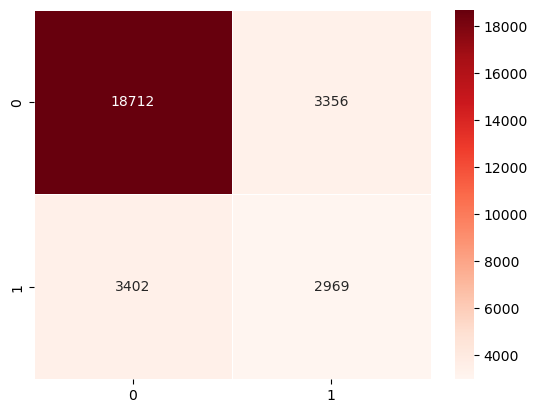

Akurasi : 0.7623685783607018
Presisi : 0.46601789358028567
Recall : 0.4694071146245059
F1 score: 0.46770636420919975
Training accuracy score:  0.8246303426692688
Testing accuracy score:  0.7623685783607018
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22068
           1       0.47      0.47      0.47      6371

    accuracy                           0.76     28439
   macro avg       0.66      0.66      0.66     28439
weighted avg       0.76      0.76      0.76     28439



In [60]:
y_pred = model1.predict(xtest)

logreg = confusion_matrix(y_test, y_pred)
sns.heatmap(logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

print('Akurasi :', accuracy_score(y_pred, y_test))
print('Presisi :', precision_score(y_pred, y_test))
print('Recall :', recall_score(y_pred, y_test))
print("F1 score:",f1_score(y_pred, y_test))
print("Training accuracy score: ",model1.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

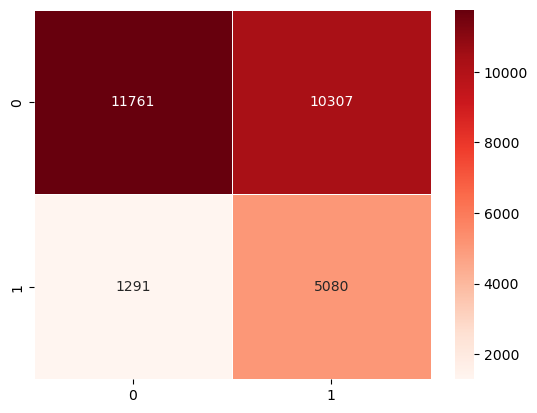

Akurasi : 0.5921797531558775
Presisi : 0.7973630513263223
Recall : 0.33014882693182557
F1 score: 0.46695468333486534
Training accuracy score:  0.836550802609139
Testing accuracy score:  0.5921797531558775
              precision    recall  f1-score   support

           0       0.90      0.53      0.67     22068
           1       0.33      0.80      0.47      6371

    accuracy                           0.59     28439
   macro avg       0.62      0.67      0.57     28439
weighted avg       0.77      0.59      0.62     28439



In [61]:
y_pred2 = model2.predict(xtest)

svm = confusion_matrix(y_test, y_pred2)
sns.heatmap(svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

print('Akurasi :', accuracy_score(y_pred2, y_test))
print('Presisi :', precision_score(y_pred2, y_test))
print('Recall :', recall_score(y_pred2, y_test))
print("F1 score:",f1_score(y_pred2, y_test))
print("Training accuracy score: ",model2.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))

Kesimpulan :

- Model Logistic Regression memiliki nilai evaluasi model Akurasi dan Recall yang lebih baik dibandingkan model svm tetapi presisinya lebih rendah. Disamping itu, F1 score pada kedua model bernilai sama.
- Nilai evaluasi dari kedua model tidak berbeda jauh satu sama lain, kedua model cukup baik untuk melakukan prediksi hujan di Australia.

## 10. Model Inference
***
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [62]:
X_new = {'Location':[1,2,3,4,5], 'MinTemperature':[7.3,8.5,11.2,14.6,18], 'MaxTemperature':[22.1,23.8,25,27.4,28], 
         'Rainfall':[1,0.5,0.3,1,0.8], 'Evaporation':[3,4.4,4.9,5,5.2], 'Sunshine':[6,7,8,8.6,9], 
         'WindSpeed':[12.45,20.5,11.4,45.3,30.2], 'Humidity9am':[10.85,4.5,12,15.5,20.3], 
         'Humidity3pm':[11,1.25,2.3,20.4,4.52], 'Cloud9am':[2,6,4.6,7.7,9], 'Cloud3pm':[3,2,5.6,2.4,8.3], 
         'RainToday':[0,1,0,1,0], 'TempDifference':[10.4,17.8,21.7,18.1,14.2]}
X_new = pd.DataFrame(X_new)
X_new.head()

,Location,MinTemperature,MaxTemperature,Rainfall,Evaporation,Sunshine,WindSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,TempDifference
0,1,7.3,22.1,1.0,3.0,6.0,12.45,10.85,11.00,2.0,3.0,0,10.4
1,2,8.5,23.8,0.5,4.4,7.0,20.50,4.50,1.25,6.0,2.0,1,17.8
2,3,11.2,25.0,0.3,4.9,8.0,11.40,12.00,2.30,4.6,5.6,0,21.7
3,4,14.6,27.4,1.0,5.0,8.6,45.30,15.50,20.40,7.7,2.4,1,18.1
4,5,18.0,28.0,0.8,5.2,9.0,30.20,20.30,4.52,9.0,8.3,0,14.2


In [63]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

In [64]:
list(X_new)

[array([-1.41421356, -1.1719096 , -1.43423165,  1.00514142, -1.88682977,
        -1.57434186, -0.91271299, -0.34038959,  0.43675775, -1.58239253,
        -0.5298797 , -0.81649658, -1.57244753]),
 array([-0.70710678, -0.8675175 , -0.66265133, -0.78975397, -0.12578865,
        -0.65902682, -0.2749231 , -1.55470078, -0.93426222,  0.05739248,
        -0.95041914,  1.22474487,  0.35406103]),
 array([ 0.        , -0.18263526, -0.1180064 , -1.50771213,  0.50315461,
         0.25628821, -0.99590298, -0.12047497, -0.78661392, -0.51653228,
         0.56352285, -0.81649658,  1.36938311]),
 array([ 0.70710678,  0.67980903,  0.97128346,  1.00514142,  0.62894326,
         0.80547723,  1.68994515,  0.54883041,  1.75856161,  0.7543011 ,
        -0.78220337,  1.22474487,  0.43216273]),
 array([ 1.41421356,  1.54225333,  1.24360593,  0.28718326,  0.88052056,
         1.17160324,  0.49359392,  1.46673493, -0.47444322,  1.28723123,
         1.69897935, -0.81649658, -0.58315935])]

In [65]:
y_pred1 = model1.predict(X_new)
y_pred2 = model2.predict(X_new)
print('Prediksi Hujan: ')
print(y_pred1)
print(y_pred2)

Prediksi Hujan: 
[0 1 0 0 0]
[1 0 0 0 1]


## 11. Pengambilan Kesimpulan
***
Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
- Terdapat 22 atribut yang diasumsikan memengaruhi Hari besok Hujan. Setelah dilakukan analisis, diambil 13 atribut/faktor yang paling berpengaruh dalam model.
- Faktor-faktor yang berpengaruh signifikan terhadap terjadi Hari besok Hujan yaitu *Location*, *MinTemperature*	*MaxTemperature*, *Rainfall*, *Evaporation*, *Sunshine*, *WindSpeed*, *Humidity9am*, *Humidity3pm*, *Cloud9am*, *Cloud3pm*	*RainToday*, dan *TempDifference*.
- Model *Logistic Regression* mempunyai akurasi sebesar **0.76**, Presisi sebesar **0.47**, Recall sebesar **0.47**, dan F1 Score sebesar **0.47**.
- Model SVM mempunyai akurasi sebesar Akurasi **0.59**, Presisi sebesar **0.80**, Recall sebesar **0.33**, dan F1 Score sebesar **0.47**.
- Karena pada target tidak seimbang, maka evaluasi model yang digunakan adalah F1 Score dan model yang dipilih untuk deployment adalah *Logistic Regression*.